## Import Libraries:

In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

## Load dataset

In [5]:
df = pd.read_csv("diabetes_binary_health_indicators_BRFSS2015.csv")

## 1. Data exploration (understand and visualize the data set)

In [6]:
profile = ProfileReport(df, title="Profiling Report")

In [7]:
profile.to_file("analysis_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
print("First few rows of the dataset:")
df.head()

First few rows of the dataset:


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [9]:
print("Columns in the dataset:")
df.columns

Columns in the dataset:


Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [10]:
print("Statistical summary of the dataset:")
df.describe().T

Statistical summary of the dataset:


,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,253680.0,0.139333,0.346294,0.0,0.0,0.0,0.0,1.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


In [11]:
print("Information about the dataset:")
df.info()

Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth              

In [12]:
print("Number of missing values in each column:")
df.isnull().sum()

Number of missing values in each column:


Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [13]:
print("Number of duplicated rows in the dataset:")
df.duplicated().sum()

Number of duplicated rows in the dataset:


24206

In [14]:
print("Number of unique values in each column:")
df.nunique()

Number of unique values in each column:


Diabetes_binary          2
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     84
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
dtype: int64

In [15]:
print("Correlation matrix:")
df.corr(numeric_only=True)

Correlation matrix:


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_binary,1.000000,0.263129,0.200276,0.064761,0.216843,0.060789,0.105816,0.177282,-0.118133,-0.040779,...,0.016255,0.031433,0.293569,0.069315,0.171337,0.218344,0.031430,0.177442,-0.124456,-0.163919
HighBP,0.263129,1.000000,0.298199,0.098508,0.213748,0.096991,0.129575,0.209361,-0.125267,-0.040555,...,0.038425,0.017358,0.300530,0.056456,0.161212,0.223618,0.052207,0.344452,-0.141358,-0.171235
HighChol,0.200276,0.298199,1.000000,0.085642,0.106722,0.091299,0.092620,0.180765,-0.078046,-0.040859,...,0.042230,0.013310,0.208426,0.062069,0.121751,0.144672,0.031205,0.272318,-0.070802,-0.085459
CholCheck,0.064761,0.098508,0.085642,1.000000,0.034495,-0.009929,0.024158,0.044206,0.004190,0.023849,...,0.117626,-0.058255,0.046589,-0.008366,0.031775,0.040585,-0.022115,0.090321,0.001510,0.014259
BMI,0.216843,0.213748,0.106722,0.034495,1.000000,0.013804,0.020153,0.052904,-0.147294,-0.087518,...,-0.018471,0.058206,0.239185,0.085310,0.121141,0.197078,0.042950,-0.036618,-0.103932,-0.100069
Smoker,0.060789,0.096991,0.091299,-0.009929,0.013804,1.000000,0.061173,0.114441,-0.087401,-0.077666,...,-0.023251,0.048946,0.163143,0.092196,0.116460,0.122463,0.093662,0.120641,-0.161955,-0.123937
Stroke,0.105816,0.129575,0.092620,0.024158,0.020153,0.061173,1.000000,0.203002,-0.069151,-0.013389,...,0.008776,0.034804,0.177942,0.070172,0.148944,0.176567,0.002978,0.126974,-0.076009,-0.128599
HeartDiseaseorAttack,0.177282,0.209361,0.180765,0.044206,0.052904,0.114441,0.203002,1.000000,-0.087299,-0.019790,...,0.018734,0.031000,0.258383,0.064621,0.181698,0.212709,0.086096,0.221618,-0.099600,-0.141011
PhysActivity,-0.118133,-0.125267,-0.078046,0.004190,-0.147294,-0.087401,-0.069151,-0.087299,1.000000,0.142756,...,0.035505,-0.061638,-0.266186,-0.125587,-0.219230,-0.253174,0.032482,-0.092511,0.199658,0.198539
Fruits,-0.040779,-0.040555,-0.040859,0.023849,-0.087518,-0.077666,-0.013389,-0.019790,0.142756,1.000000,...,0.031544,-0.044243,-0.103854,-0.068217,-0.044633,-0.048352,-0.091175,0.064547,0.110187,0.079929


# 1.1:  Plotting

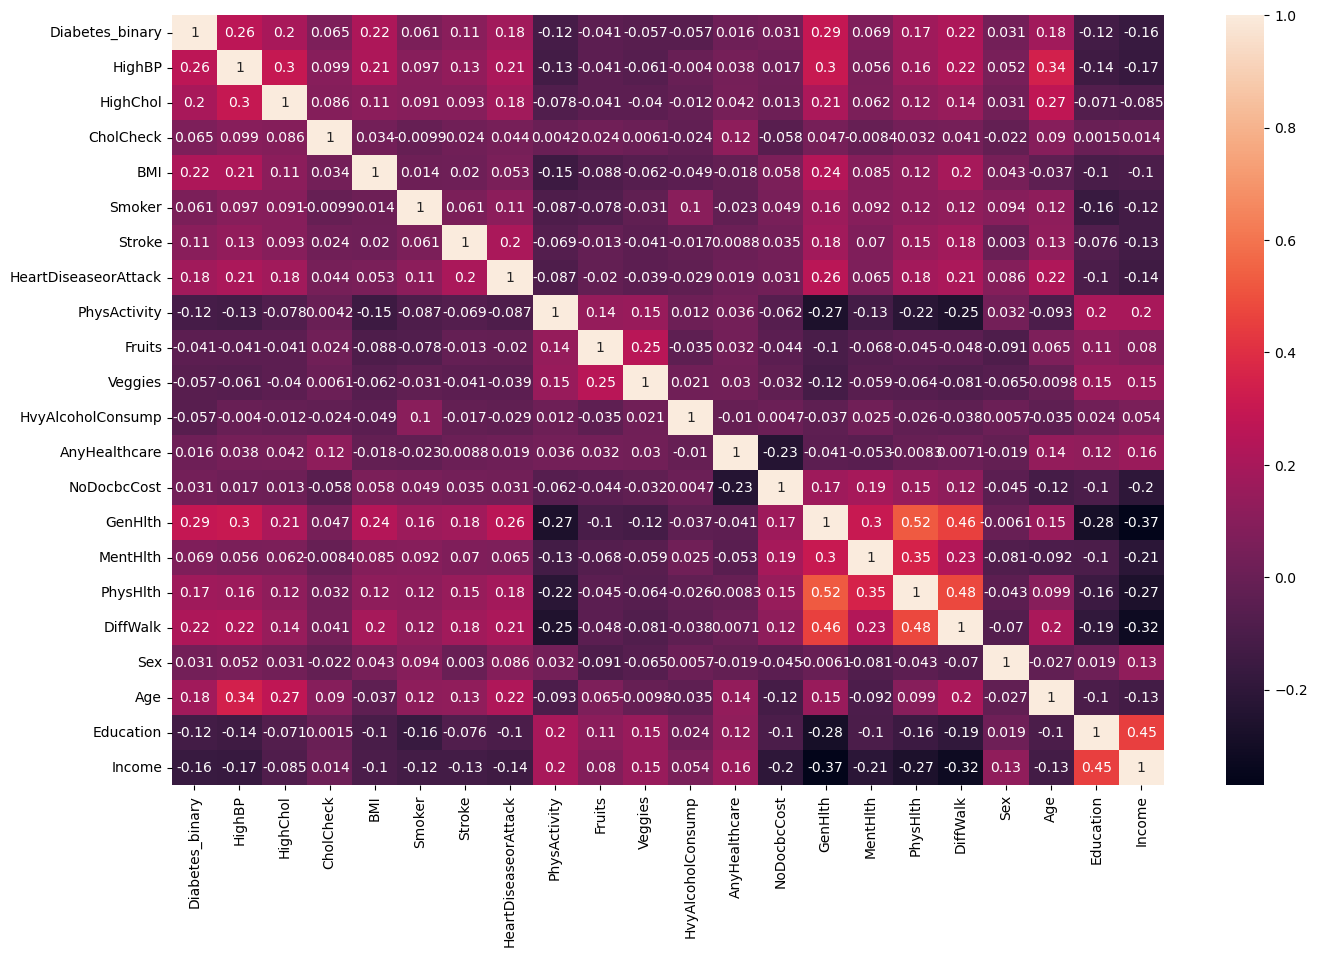

In [16]:
plt.figure(figsize = (16,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

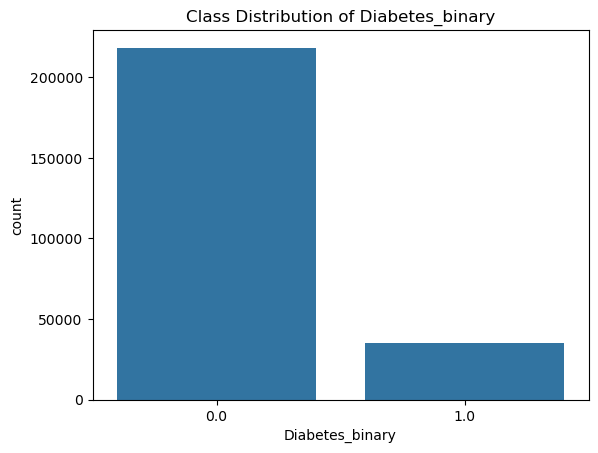

In [17]:
sns.countplot(x='Diabetes_binary', data=df)
plt.title("Class Distribution of Diabetes_binary")
plt.show()

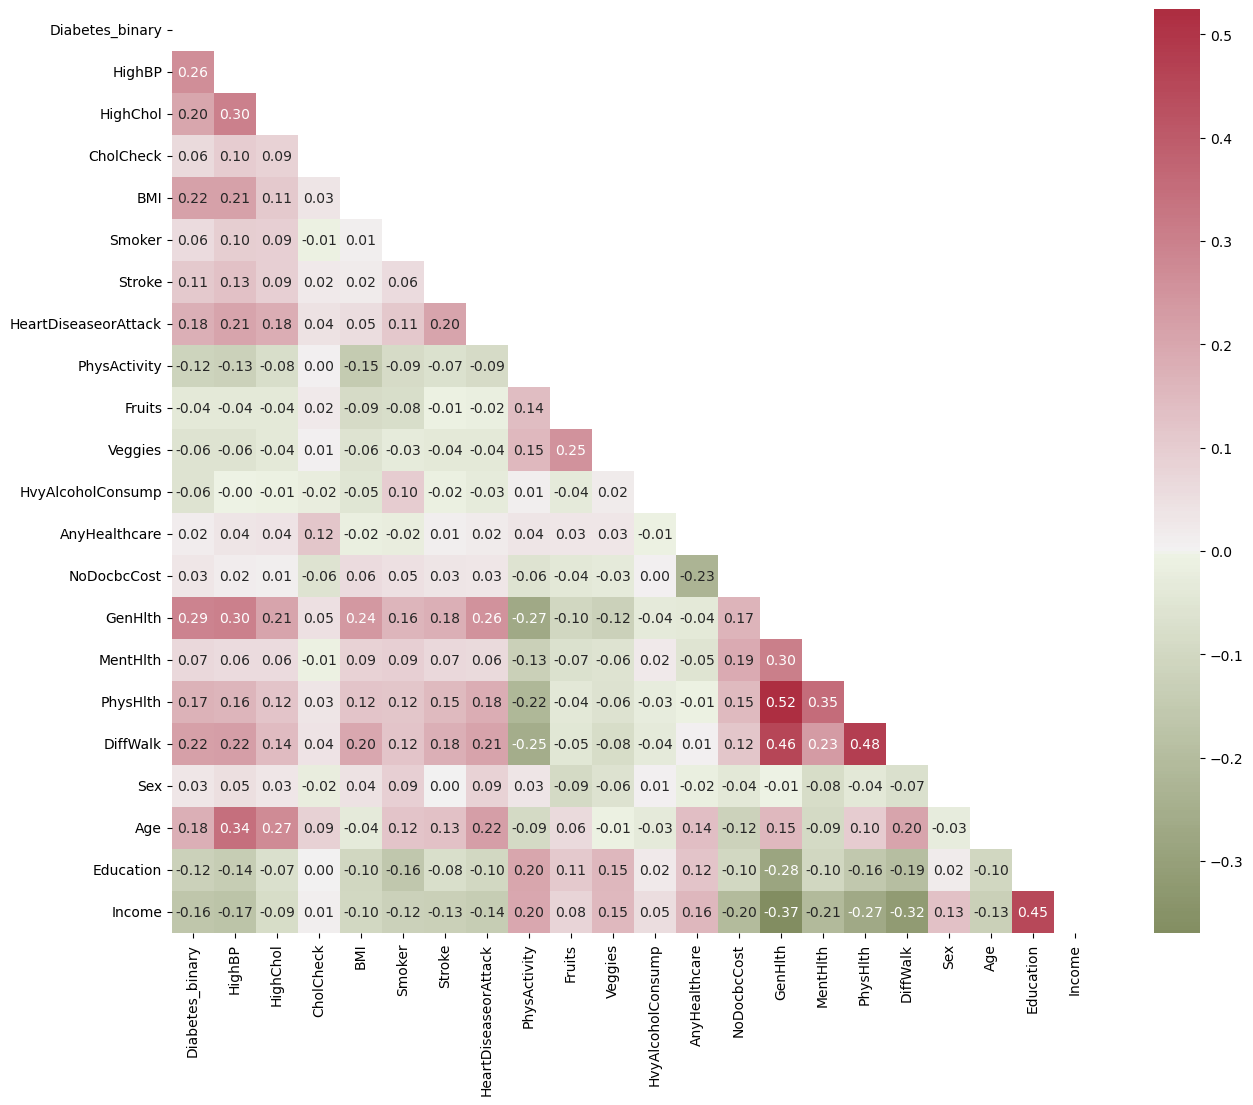

In [18]:
corr = df.corr()

# Create a mask
mask = np.triu(np.ones_like(corr, dtype=bool))

# Create a custom divergin palette
cmap = sns.diverging_palette(100, 7, s=75, l=40, n=5, center="light", as_cmap=True)
plt.figure(figsize=(15, 12))
sns.heatmap(corr, mask=mask, center=0, annot=True, fmt='.2f', square=True, cmap=cmap)

plt.show()

In [19]:
df.corr()["Diabetes_binary"].sort_values()

Income                 -0.163919
Education              -0.124456
PhysActivity           -0.118133
HvyAlcoholConsump      -0.057056
Veggies                -0.056584
Fruits                 -0.040779
AnyHealthcare           0.016255
Sex                     0.031430
NoDocbcCost             0.031433
Smoker                  0.060789
CholCheck               0.064761
MentHlth                0.069315
Stroke                  0.105816
PhysHlth                0.171337
HeartDiseaseorAttack    0.177282
Age                     0.177442
HighChol                0.200276
BMI                     0.216843
DiffWalk                0.218344
HighBP                  0.263129
GenHlth                 0.293569
Diabetes_binary         1.000000
Name: Diabetes_binary, dtype: float64

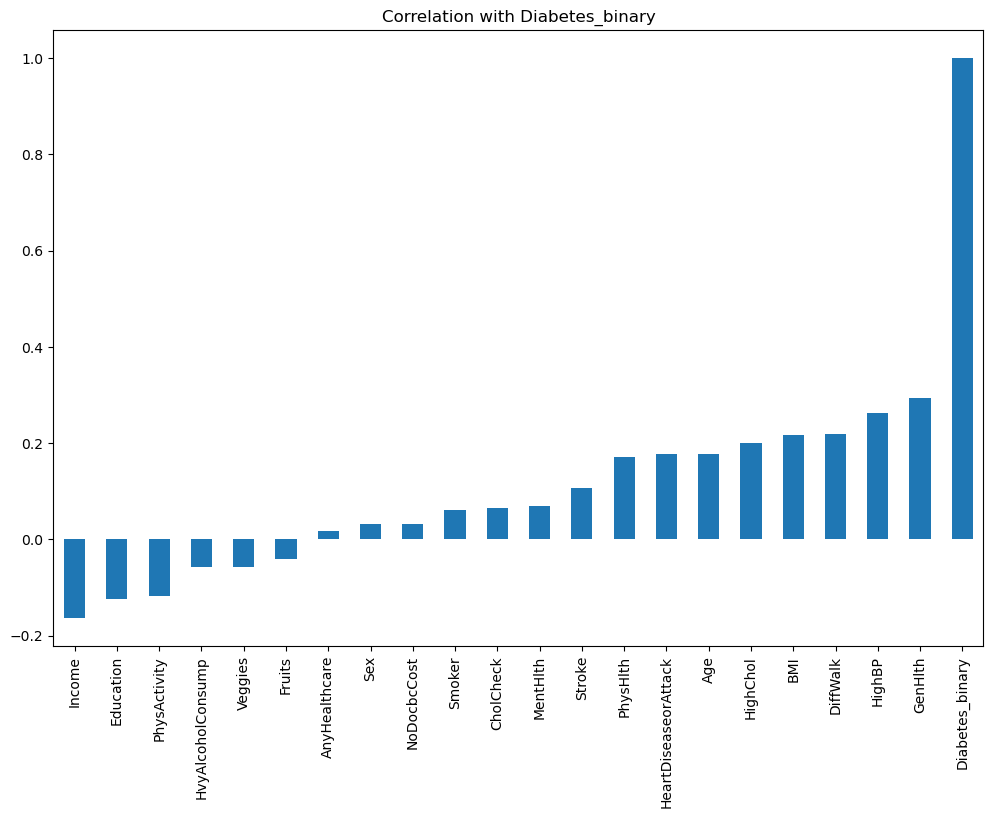

In [20]:
plt.figure(figsize=(12, 8))
df.corr()['Diabetes_binary'].sort_values().plot(kind='bar')
plt.title('Correlation with Diabetes_binary')
plt.show()

## 2. Data preprocessing

### 2.2 Feature Selection: remove irrelevant features.

Features with low absolute correlation coefficients close to 0 (-0.1 to 0.1) are less relevant. These include:

Income,
Education,
PhysActivity,
HvyAlcoholConsump,
Veggies,
Fruits,
AnyHealthcare,
Sex,
NoDocbcCost


In [21]:
X = df.drop(columns=['Diabetes_binary', 'Income',
                     'Education',
                     'PhysActivity',
                     'HvyAlcoholConsump',
                     'Veggies',
                     'Fruits',
                     'AnyHealthcare',
                     'Sex',
                     'NoDocbcCost'])
y = df['Diabetes_binary']

In [22]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [23]:
smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Step 5: Combine original and synthetic samples into a balanced dataset
X_train = pd.DataFrame(X_train_resampled, columns=X_train.columns)
y_train = pd.Series(y_train_resampled)

In [24]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # placeholder, will be replaced by the best scaler
    ('classifier', RandomForestClassifier())  # placeholder, will be replaced by the best classifier
])


param_grid = {
    'scaler': [StandardScaler(), MinMaxScaler(), RobustScaler()],
    'classifier': [RandomForestClassifier(),KNeighborsClassifier(),GaussianNB(),DecisionTreeClassifier(),GradientBoostingClassifier(),XGBClassifier(),CatBoostClassifier(logging_level='Silent')],
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', LogisticRegression())]),
             param_grid={'classifier': [LogisticRegression(),
                                        RandomForestClassifier(),
                                        KNeighborsClassifier(), GaussianNB(),
                                        DecisionTreeClassifier(),
                                        GradientBoostingClassifier(),
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=No...
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...),
                                        <catboost.core.CatBoostClassifier object at 0x17801b200>],
                         'scaler': [StandardScaler(), MinMaxScaler(),
                                    RobustScaler()]},
             scoring='accuracy')

In [26]:
# Get the best scaling technique and best classifier
best_scaler = grid_search.best_params_['scaler']
best_classifier = grid_search.best_estimator_['classifier']
best_hyperparameters = grid_search.best_params_

# Now, use the best scaling technique and classifier on the test data
best_pipeline = Pipeline([
    ('scaler', best_scaler),
    ('classifier', best_classifier)
])

best_pipeline.fit(X_train, y_train)
accuracy = best_pipeline.score(X_test, y_test)

# Print the best hyperparameters and accuracy
print("Best Scaling Technique:", best_scaler)
print("Best Classifier:", best_classifier)
print("Best Hyperparameters:", best_hyperparameters)
print("Accuracy:", accuracy)

Best Scaling Technique: MinMaxScaler()
Best Classifier: RandomForestClassifier()
Best Hyperparameters: {'classifier': RandomForestClassifier(), 'scaler': MinMaxScaler()}
Accuracy: 0.8209686744454956
